<a href="https://colab.research.google.com/github/Intelligence-Engineering-LAB-KU/Seminar/blob/master/summer_2020/0726_wschoi_sobel_operator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 라이브러리 로드

필요한 라이브러리를 로드해줍니다.

In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt


Using TensorFlow backend.


## 2. 데이터셋 로드

이번에도 [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) 데이터를 사용할 예정입니다. 

CIFAR-10에 대한 데이터 살펴보기 예제는 [이 포스트](https://github.com/Intelligence-Engineering-LAB-KU/Deeplearning-Tutorial/blob/master/Tutorial%201%29%20CIFAR10_Softmax.ipynb)를 복습해주세요.

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

1번 인덱스에 위치한 말 이미지를 불러와보겠습니다.

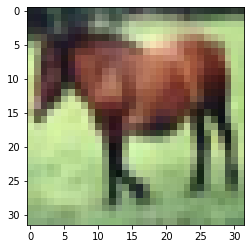

label:  [7]


In [3]:
plt.figure(figsize=(4,4))
plt.imshow(x_train[7].astype('uint8'), cmap=plt.cm.gray)
plt.show()

print('label: ', y_train[7])

Sobel opearatoin은 일반적으로 단일채널인 흑백 이미지에 적용됩니다. 3채널 이미지를 흑백 이미지로 만들어보겠습니다.


shape: (32, 32)


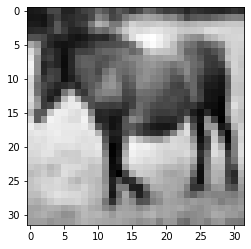

In [4]:
def to_grayscale(img):
  return np.sum(img, axis=-1)/3

gray_img = to_grayscale(x_train[7])

print('shape:', gray_img.shape)
plt.figure(figsize=(4,4))
plt.imshow(gray_img.astype('uint8'), cmap=plt.cm.gray)
plt.show()

### 3. Sobel Opearation

이중 for 문으로 [Sobel Opearator](https://en.wikipedia.org/wiki/Sobel_operator) 을 구현해보겠습니다.

먼저 두 Sobel Filter를 만들어보겠습니다.

$K_{x} = \begin{bmatrix}+1&0&-1\\+2&0&-2\\+1&0&-1\end{bmatrix}$

$K_{y} = \begin{bmatrix}+1&+2&+1\\0&0&0\\-1&-2&-1\end{bmatrix}$


In [5]:
## Sobel Filter

Kx = np.array([[+1, 0, -1], [+2, 0, -2], [+1, 0, -1]])
Ky = np.copy(Kx).T

print('Kx:\n', Kx)
print('Ky:\n', Ky)

Kx:
 [[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
Ky:
 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


이제 Convolution 함수를 만들어보겠습니다.

In [6]:
def conv(img, filter):
  img_x_size, img_y_size = img.shape

  filter_x_size, filter_y_size = filter.shape

  output_x_size = img_x_size - filter_x_size +1
  output_y_size = img_y_size - filter_y_size +1

  output = np.zeros((output_x_size, output_y_size))
  for i in range(img_x_size - filter_x_size +1):
    for j in range(img_y_size - filter_y_size +1):
      ## Quiz: 이 쪽을 구현하셔야 합니다.
      output [i,j]= # TODO
      ## Quiz: 이 쪽을 구현하셔야 합니다.
      
  return output


Convolution operation과 Sobel Filter를 이용하여 다음과 같이 Sobel Opearator를 구현해보겠습니다. 그리고 구현된 sobel operation으로 말 이미지의 윤곽을 추출해보겠습니다.

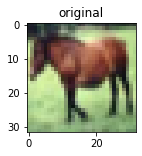

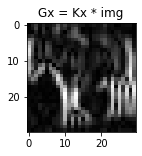

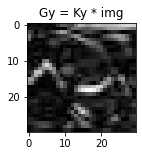

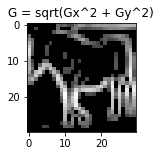

In [7]:
def sobel (img, thresold=180):
  convx = conv(img, Kx)
  convy = conv(img, Ky)
  output = np.sqrt(convx**2 + convy**2)
  mask = output > thresold
  return output * mask

plt.figure(figsize=(2,2))
plt.imshow(x_train[7].astype('uint8'))
plt.title('original')
plt.show()

plt.figure(figsize=(2,2))
plt.imshow(np.abs(conv(to_grayscale(x_train[7]), Kx)), cmap=plt.cm.gray)
plt.title('Gx = Kx * img')
plt.show()

plt.figure(figsize=(2,2))
plt.imshow(np.abs(conv(to_grayscale(x_train[7]), Ky)), cmap=plt.cm.gray)
plt.title('Gy = Ky * img')
plt.show()

plt.figure(figsize=(2,2))
plt.imshow(sobel(to_grayscale(x_train[7])), cmap=plt.cm.gray)
plt.title('G = sqrt(Gx^2 + Gy^2)')
plt.show()

soboel opearation을 다양한 클래스에 적용해보겠습니다.

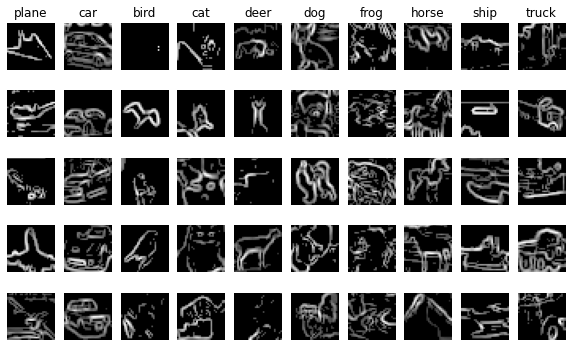

In [8]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 5

plt.figure(figsize=(10,6))
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(sobel(to_grayscale(x_train[idx])), cmap=plt.cm.gray)
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()


## Reference

- [cs231n](http://cs231n.github.io/)
- [Keras tutorial on CIFAR-10](https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py)